<a href="https://colab.research.google.com/github/setyawanek/Data_Visualisasi/blob/main/klasifikasi_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Data

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


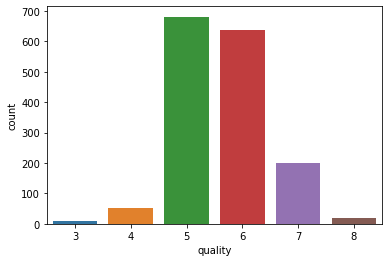

In [ ]:
sns.countplot(x = 'quality', data = df)
plt.show()

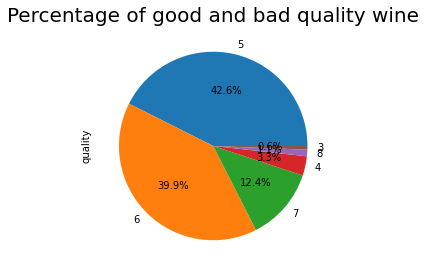

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of good and bad quality wine',fontsize = 20)
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# cek data kosong
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#menghapus data yang sama
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

In [ ]:
df['quality'][df['quality'] <= 6.5]= 0 #bad quality
df['quality'][df['quality'] > 6.5]= 1 #good quality

#EDA

In [ ]:
df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

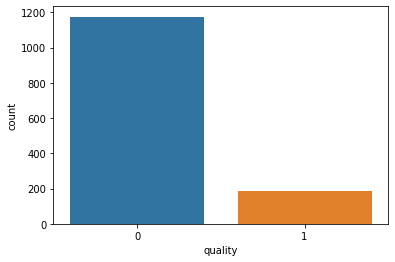

In [ ]:
sns.countplot(x = 'quality', data = df)
plt.show()

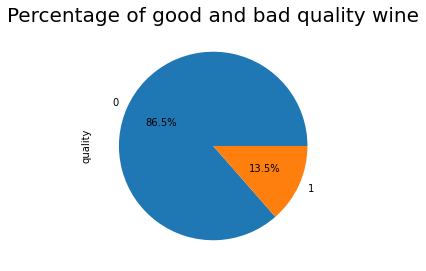

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of good and bad quality wine',fontsize = 20)
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")

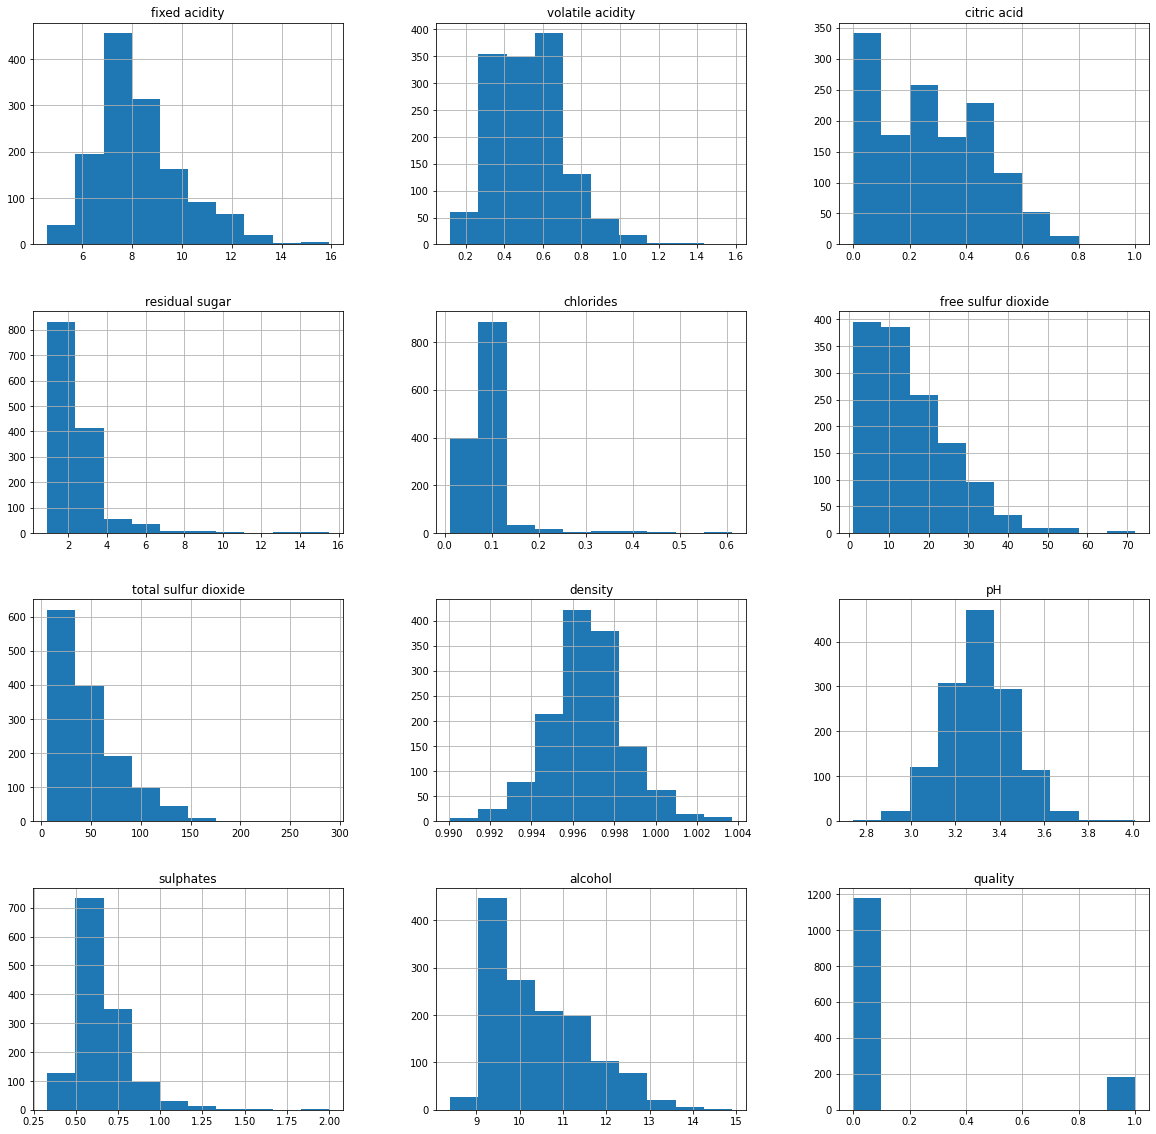

In [ ]:
df.hist(bins= 10, figsize=(20,20))
plt.show()

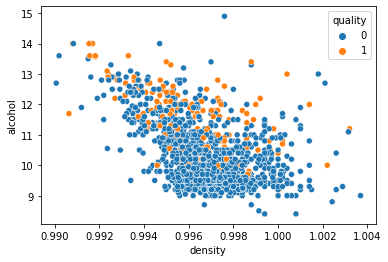

In [ ]:
sns.scatterplot(data=df, x='density', y='alcohol', hue='quality')
plt.show()

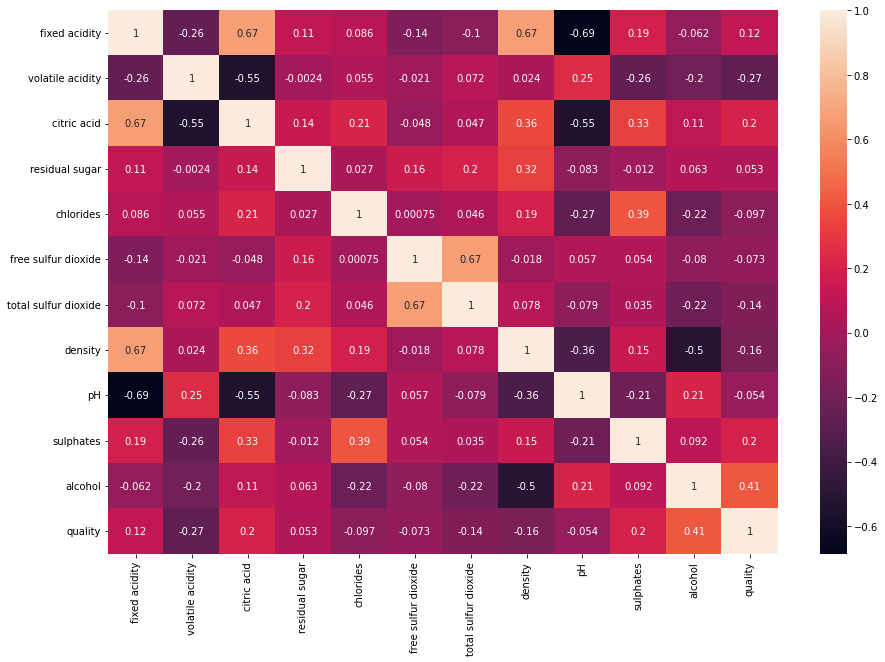

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

#Model

In [ ]:
df2 = df.drop(['residual sugar', 'chlorides', 'free sulfur dioxide', 'pH'], axis=1)
df2.head(2)

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.0,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.0,67.0,0.9968,0.68,9.8,0


In [ ]:
x = df2.drop('quality', axis=1)
x.head(4)

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,60.0,0.9980,0.58,9.8


In [ ]:
y = df2[['quality']]
y.head(4)

,quality
0,0
1,0
2,0
3,0


In [ ]:
x.corr()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
fixed acidity,1.000000,-0.255124,0.667437,-0.103777,0.670195,0.190269,-0.061596
volatile acidity,-0.255124,1.000000,-0.551248,0.071701,0.023943,-0.256948,-0.197812
citric acid,0.667437,-0.551248,1.000000,0.047358,0.357962,0.326062,0.105108
total sulfur dioxide,-0.103777,0.071701,0.047358,1.000000,0.078141,0.035291,-0.217829
density,0.670195,0.023943,0.357962,0.078141,1.000000,0.146036,-0.504995
sulphates,0.190269,-0.256948,0.326062,0.035291,0.146036,1.000000,0.091621
alcohol,-0.061596,-0.197812,0.105108,-0.217829,-0.504995,0.091621,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [ ]:
print(df.shape)
print(df2.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1359, 12)
(1359, 8)
(1087, 7) (1087, 1)
(272, 7) (272, 1)


###Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=10)

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

[Text(0.5, 0.9, 'X[6] <= 11.55\ngini = 0.237\nsamples = 1087\nvalue = [938, 149]'),
 Text(0.25, 0.7, 'X[1] <= 0.335\ngini = 0.14\nsamples = 913\nvalue = [844, 69]'),
 Text(0.125, 0.5, 'X[6] <= 10.45\ngini = 0.422\nsamples = 109\nvalue = [76, 33]'),
 Text(0.0625, 0.3, 'X[0] <= 14.65\ngini = 0.212\nsamples = 58\nvalue = [51, 7]'),
 Text(0.03125, 0.1, 'gini = 0.188\nsamples = 57\nvalue = [51, 6]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.3, 'X[0] <= 8.35\ngini = 0.5\nsamples = 51\nvalue = [25, 26]'),
 Text(0.15625, 0.1, 'gini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.21875, 0.1, 'gini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(0.375, 0.5, 'X[6] <= 10.45\ngini = 0.086\nsamples = 804\nvalue = [768, 36]'),
 Text(0.3125, 0.3, 'X[4] <= 1.002\ngini = 0.038\nsamples = 570\nvalue = [559, 11]'),
 Text(0.28125, 0.1, 'gini = 0.035\nsamples = 566\nvalue = [556, 10]'),
 Text(0.34375, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4375, 

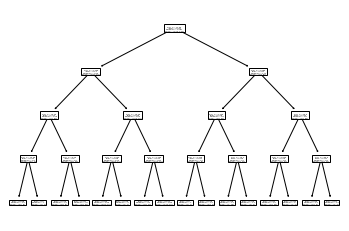

In [ ]:
from sklearn import tree

tree.plot_tree(dt)

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

decision_tree_acc = accuracy_score(y_test,y_pred_dt)
decision_tree_acc

0.8639705882352942

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       237
           1       0.46      0.31      0.37        35

    accuracy                           0.86       272
   macro avg       0.68      0.63      0.65       272
weighted avg       0.85      0.86      0.85       272



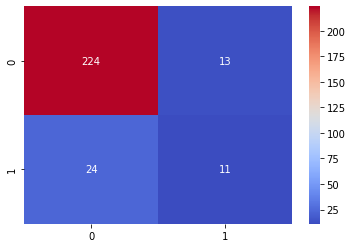

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')

In [ ]:
hasil_Prediksi = pd.DataFrame()

hasil_Prediksi['Quality aktual'] = y_test
hasil_Prediksi['Prediksi Decision Tree'] = y_pred_dt

hasil_Prediksi.head(10)

,Quality aktual,Prediksi Decision Tree
880,0,0
1335,0,0
1370,0,0
1430,0,0
444,1,1
876,0,0
441,0,0
1419,0,0
773,0,0
418,0,0


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=10)

clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [ ]:
print(y_train.shape)
print(y_train.values[:,0].shape)

(1087, 1)
(1087,)


In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=10)

clf.fit(x_train, y_train.values[:,0])

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
y_pred_clf = clf.predict(x_test)

In [ ]:
randomforest_acc = accuracy_score(y_test,y_pred_clf)
randomforest_acc

0.8786764705882353

In [ ]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       237
           1       0.60      0.17      0.27        35

    accuracy                           0.88       272
   macro avg       0.74      0.58      0.60       272
weighted avg       0.85      0.88      0.85       272



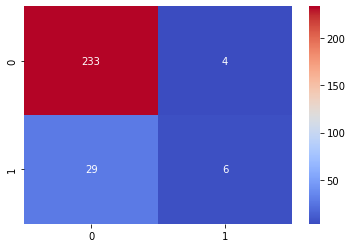

In [ ]:
cm = confusion_matrix(y_test, y_pred_clf)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')

In [ ]:
#Hasil Prediksi
hasil_Prediksi['Prediksi Random Forest'] = y_pred_clf

hasil_Prediksi.head(10)

,Quality aktual,Prediksi Decision Tree,Prediksi Random Forest
880,0,0,0
1335,0,0,0
1370,0,0,0
1430,0,0,0
444,1,1,0
876,0,0,0
441,0,0,0
1419,0,0,0
773,0,0,0
418,0,0,0


##K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train.values[:,0])

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_acc

0.8566176470588235

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       237
           1       0.36      0.14      0.20        35

    accuracy                           0.86       272
   macro avg       0.62      0.55      0.56       272
weighted avg       0.82      0.86      0.83       272



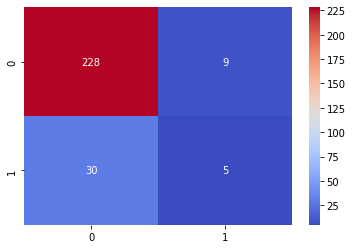

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')

In [ ]:
#Hasil Prediksi
hasil_Prediksi['Prediksi KNN'] = y_pred_knn

hasil_Prediksi.head(10)

,Quality aktual,Prediksi Decision Tree,Prediksi Random Forest,Prediksi KNN
880,0,0,0,0
1335,0,0,0,0
1370,0,0,0,0
1430,0,0,0,0
444,1,1,0,0
876,0,0,0,0
441,0,0,0,0
1419,0,0,0,0
773,0,0,0,0
418,0,0,0,0


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train.values[:,0])

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(x_test)

In [ ]:
nb_acc = accuracy_score(y_test,y_pred_nb)
nb_acc

0.8676470588235294

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       237
           1       0.49      0.54      0.51        35

    accuracy                           0.87       272
   macro avg       0.71      0.73      0.72       272
weighted avg       0.87      0.87      0.87       272



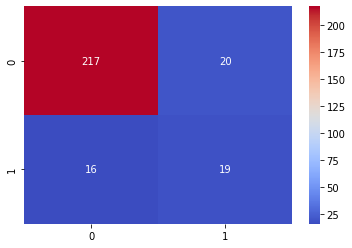

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm, annot=True, cmap='coolwarm',fmt='g')

In [ ]:
#Hasil Prediksi

hasil_Prediksi['Prediksi Naive Bayes'] = y_pred_nb

hasil_Prediksi.head(10)

,Quality aktual,Prediksi Decision Tree,Prediksi Random Forest,Prediksi KNN,Prediksi Naive Bayes
880,0,0,0,0,0
1335,0,0,0,0,0
1370,0,0,0,0,0
1430,0,0,0,0,0
444,1,1,0,0,1
876,0,0,0,0,0
441,0,0,0,0,1
1419,0,0,0,0,0
773,0,0,0,0,0
418,0,0,0,0,0


##SVM

In [ ]:
from sklearn import svm

sv = svm.SVC()

sv.fit(x_train,y_train.values[:,0])

SVC()

In [ ]:
y_pred_svm = sv.predict(x_test)

In [ ]:
sv_acc = accuracy_score(y_test,y_pred_svm)
sv_acc

0.8713235294117647

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       237
           1       0.00      0.00      0.00        35

    accuracy                           0.87       272
   macro avg       0.44      0.50      0.47       272
weighted avg       0.76      0.87      0.81       272



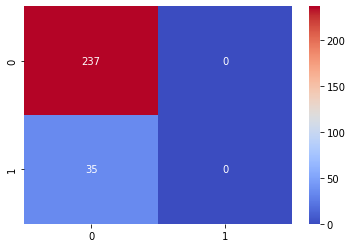

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, cmap='coolwarm',fmt='g')

In [ ]:
#Hasil Prediksi
hasil_Prediksi['Prediksi SVM'] = y_pred_svm

hasil_Prediksi.head(10)

,Quality aktual,Prediksi Decision Tree,Prediksi Random Forest,Prediksi KNN,Prediksi Naive Bayes,Prediksi SVM
880,0,0,0,0,0,0
1335,0,0,0,0,0,0
1370,0,0,0,0,0,0
1430,0,0,0,0,0,0
444,1,1,0,0,1,0
876,0,0,0,0,0,0
441,0,0,0,0,1,0
1419,0,0,0,0,0,0
773,0,0,0,0,0,0
418,0,0,0,0,0,0


##ANN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils 

In [ ]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (1087, 7)
y_train shape (1087, 1)
x_test shape (272, 7)
y_test shape (272, 1)


In [ ]:
nb_classes = 10 # number of unique digits

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes) 

In [ ]:
y_train[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(7,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               4096      
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 271,882
Trainable params: 271,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.2 , batch_size = 32, epochs = 150, verbose=1)

Epoch 1/150
28/28 [==============================] - 1s 15ms/step - loss: 0.9298 - accuracy: 0.7687 - val_loss: 0.4448 - val_accuracy: 0.8716
Epoch 2/150
28/28 [==============================] - 0s 8ms/step - loss: 0.6280 - accuracy: 0.8009 - val_loss: 0.3882 - val_accuracy: 0.8716
Epoch 3/150
28/28 [==============================] - 0s 9ms/step - loss: 0.6436 - accuracy: 0.8124 - val_loss: 0.6537 - val_accuracy: 0.6606
Epoch 4/150
28/28 [==============================] - 0s 8ms/step - loss: 0.5736 - accuracy: 0.8285 - val_loss: 0.8085 - val_accuracy: 0.1422
Epoch 5/150
28/28 [==============================] - 0s 8ms/step - loss: 0.5389 - accuracy: 0.8239 - val_loss: 0.3699 - val_accuracy: 0.8716
Epoch 6/150
28/28 [==============================] - 0s 8ms/step - loss: 0.4864 - accuracy: 0.8481 - val_loss: 0.3876 - val_accuracy: 0.8716
Epoch 7/150
28/28 [==============================] - 0s 8ms/step - loss: 0.4702 - accuracy: 0.8446 - val_loss: 0.4073 - val_accuracy: 0.8716
Epoch 8/150


In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.929795,0.768700,0.444794,0.871560
1,0.628007,0.800921,0.388184,0.871560
2,0.643575,0.812428,0.653654,0.660550
3,0.573594,0.828539,0.808491,0.142202
4,0.538911,0.823936,0.369908,0.871560
...,...,...,...,...
145,0.299062,0.869965,0.284980,0.880734
146,0.297940,0.868815,0.290664,0.889908
147,0.291983,0.865362,0.300474,0.899083
148,0.292111,0.874568,0.285708,0.889908


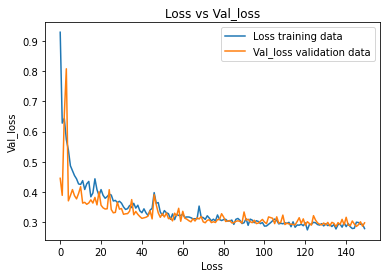

In [ ]:
plt.plot(history.history['loss'], label='Loss training data')
plt.plot(history.history['val_loss'], label='Val_loss validation data')
plt.legend()
plt.title('Loss vs Val_loss')
plt.ylabel('Val_loss')
plt.xlabel('Loss')
plt.show()

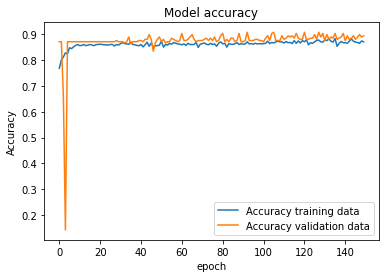

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# predict 
pred = model.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)

print(y_test.shape, pred.shape)
print(y_test[:5], pred[:5])
# (272,) (272,)
# [0 0 0 0 1] [0 0 0 0 0]

(272,) (272,)
[0 0 0 0 1] [0 0 0 0 0]


In [ ]:
pred.flatten()[:5]

array([0, 0, 0, 0, 0])

In [ ]:
ann_acc = accuracy_score(y_test,pred)
ann_acc

0.8860294117647058

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       237
           1       0.70      0.20      0.31        35

    accuracy                           0.89       272
   macro avg       0.80      0.59      0.62       272
weighted avg       0.87      0.89      0.86       272



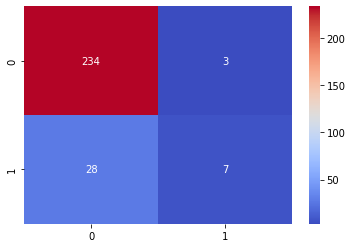

In [ ]:
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')

In [ ]:
hasil_Prediksi['prediksi ANN'] = pred
hasil_Prediksi.head(10)

,Quality aktual,Prediksi Decision Tree,Prediksi Random Forest,Prediksi KNN,Prediksi Naive Bayes,Prediksi SVM,prediksi ANN
880,0,0,0,0,0,0,0
1335,0,0,0,0,0,0,0
1370,0,0,0,0,0,0,0
1430,0,0,0,0,0,0,0
444,1,1,0,0,1,0,0
876,0,0,0,0,0,0,0
441,0,0,0,0,1,0,0
1419,0,0,0,0,0,0,0
773,0,0,0,0,0,0,0
418,0,0,0,0,0,0,0


#Perbandingan

In [ ]:
print('Perbandingan Akurasi Setiap Model')
print('================================')
print('Decision Tree           : {:.2f}%'.format(decision_tree_acc * 100))
print('Random Forest           : {:.2f}%'.format(randomforest_acc * 100))
print('KNN                     : {:.2f}%'.format(knn_acc * 100))
print('Naive Bayes             : {:.2f}%'.format(nb_acc * 100))
print('Support Vector Machines : {:.2f}%'.format(sv_acc * 100))
print('ANN                     : {:.2f}%'.format(ann_acc * 100))

Perbandingan Akurasi Setiap Model
Decision Tree           : 86.40%
Random Forest           : 87.87%
KNN                     : 85.66%
Naive Bayes             : 86.76%
Support Vector Machines : 87.13%
ANN                     : 88.60%
